# Python для анализа данных

## Домашнее задание №1

Задание выполнил: Груданов Николай Алексеевич

---

### Загрузка и первичный анализ данных

In [ ]:
# Установка библиотек если требуются
%pip install pandas
%pip install ydata-profiling
%pip install numpy
%pip install matplotlib
%pip install seaborn


In [1]:
# Импорт библиотек
import pandas as pd
import ydata_profiling as ydp
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
# Преверяем что все коректно импортировалось и смотрим версии библиотек
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
print('Matplotlib:', mp.__version__)
print('Seaborn:', sns.__version__)

Pandas: 2.2.2
Numpy: 1.26.4
Matplotlib: 3.9.2
Seaborn: 0.13.2


In [2]:
# Загрузка данных
train_df = pd.read_csv('train.csv')
lectures_df = pd.read_csv('lectures.csv')
questions_df = pd.read_csv('questions.csv')

In [3]:
# Проведем первичный анализ данных
# Так как у нас несколько датафреймов, давайте напишем функцию для анализа первичных данных

def df_info(df:pd.DataFrame)-> None:
    """
    Функция df_info выводит информацию о DataFrame.
    """
    print("Названия столбцов")
    print(df.columns) 
    print("-----------------------------------------------------------------------------------------")
    print("Описание столбцов")
    print(df.info()) 
    print("-----------------------------------------------------------------------------------------")
    print("Первые 5 строк")
    print(df.head()) 
    print("-----------------------------------------------------------------------------------------")
    print("Последние 5 строк")
    print(df.tail(5)) 
    print("-----------------------------------------------------------------------------------------")
    print("Статистические данные")
    # Форматируем результат describe() до двух знаков после запятой
    formatted = df.describe().apply(lambda x: x.apply('{:.2f}'.format))
    print(formatted)
    print("-----------------------------------------------------------------------------------------")
    print("Проверка на null значений")
    print(df.isnull().sum()) 
   


In [4]:
df_info(train_df)

Названия столбцов
Index(['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation'],
      dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_expl

In [5]:
df_info(lectures_df)

Названия столбцов
Index(['lecture_id', 'tag', 'part', 'type_of'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB
None
-----------------------------------------------------------------------------------------
Первые 5 строк
   lecture_id  tag  part           type_of
0          89  159     5           concept
1         100   70     1           concept
2         185   45     6           concept
3         192   79     5  solving question
4         317  156     5  solving question
-----------------------------------------------

In [4]:
df_info(questions_df)

Названия столбцов
Index(['question_id', 'bundle_id', 'correct_answer', 'part', 'tags'], dtype='object')
-----------------------------------------------------------------------------------------
Описание столбцов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB
None
-----------------------------------------------------------------------------------------
Первые 5 строк
   question_id  bundle_id  correct_answer  part            tags
0            0          0               0     1   51 131 162 38
1            1          1               1     1       131 36 81
2            2    

<div class="alert alert-block alert-danger">
    <p>Интерактивный отчет с использоваеним <code>ydata-profiling</code> для датафрейма <code>train_df</code>строится
        очень долго.
        </br>
        Время идет на десятки минут!
    <p>
</div>

In [16]:
# Посмотрим более детальный отчет о данных при помощи ydata_profiling
profile_train_df =ydp.ProfileReport(train_df)
profile_train_df.to_file('profile_train_df.html')# Сохраняем отчет в html файл

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/gna/.conda/envs/ml/lib/python3.12/site-packages/matplotlib/image.py:181: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
profile_lectures_df =ydp.ProfileReport(lectures_df)
profile_lectures_df.to_file('profile_lectures_df.html')# Сохраняем отчет в html файл

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
profile_questions_df =ydp.ProfileReport(questions_df)
profile_questions_df.to_file('profile_questions_df.html')# Сохраняем отчет в html файл

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

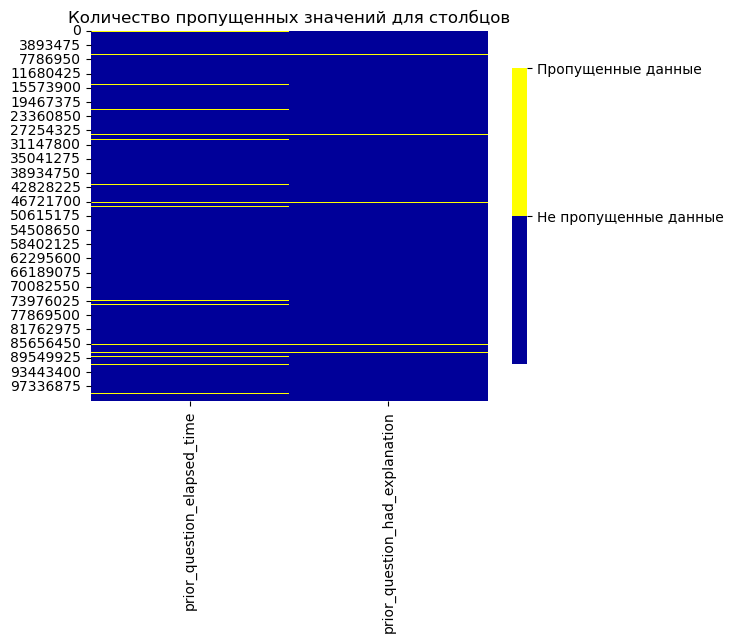

In [ ]:
# Видим что в датафрейме train_df много пустых занчей в столбцах prior_question_elapsed_time и prior_question_had_explanation
# Посмотрим подробнее
# Построим тепловую карту пропущенных значений
cols_w_none = train_df.columns[8:] #Получаем список столбцов с пропущенными значениями
# Создаем матрицу с пропущенными значениями
mask = train_df[cols_w_none].isnull()

# Создаем график

# Указываем цвец для графика
colours = ['#000099', '#ffff00'] 
sns_palette = sns.color_palette(colours)

# Построение тепловой карты
ax = sns.heatmap(mask, cmap=sns_palette, cbar_kws={"shrink": 0.8})

# Настройка цветовой шкалы
cbar = ax.collections[0].colorbar  # Получаем объект цветовой шкалы
cbar.set_ticks([0.5, 1.0])  # Устанавливаем позиции меток
cbar.set_ticklabels(['Не пропущенные данные', 'Пропущенные данные'])  # Устанавливаем текст меток

# Добавление заголовка
plt.title('Количество пропущенных значений для столбцов')

# Сохраним график
plt.savefig('heatmap_missing_values.png')

# Отображение графика
plt.show()



In [10]:
# Построим процент пропущеных значений для наших стобцов с пропусками больлше 0
for col in cols_w_none:
    pct_missing = np.mean(train_df[col].isnull())
    # Выводим больше знаков после запятой, чтобы было нагляднее чем в отчете с ydata-profiling
    print(f'{col} - {round(pct_missing*100, 5)}%') 

prior_question_elapsed_time - 2.32296%
prior_question_had_explanation - 0.38774%


 ### Выводы по первичному анализу 

1. Мы видим, что процент пропущенных данных мал
    ```
    prior_question_elapsed_time - 2.32296%
    prior_question_had_explanation - 0.38774%
    ```
    и ими можно пренебречь и убрать из датафрейма.
1. Значения в `prior_question_had_explanation` явялются булевым типом данных и также указывают правильно ли ответил студент на вопрос. Заменять их средним или модой будет не правильно
2. На тепловой карте видим что есть пересечения по пропускам у этих двух значений, это еще один повод воспользованием отбрасыванием значений из выборки, а не пытатся заполнить пробелы.

### Очистка данных и объедение с дополнительными датафреймами